# <center> Экзамен по "Науке о данных" </center>

Время выполнения заданий - 3 часа (11:00 - 14:00). 

Экзамен включает 3 обязательных задания для получения максимальной оценки (100 баллов) и 30 бонусных баллов.

До 14:00 необходимо сдать задание на Github Classroom в формате .ipynb, указав имя, фамилию и группу в названии файла, и загрузить свой код по каждой задаче на Яндекс.Контест https://contest.yandex.ru/contest/18973/enter для проверки на плагитат. 

Уточнения условия, если они будут, появятся по ссылке https://www.overleaf.com/read/kbwtcskdtbbv, в телеграм канале @room112, и в чате «Науки о данных».


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
np.random.seed(666)

### Задача про блуждание (35 баллов)

Шерлок Холмс расследует дело о пропаже бюллетеней на избирательном участке. Ватсон заметил, что всегда во время своих размышлений Холмс ходит ровно по прямой. Предположим, что в начале движения Шерлок находится в точке с координатой $0$. В каждый момент времени его координата изменяется на $\Delta x$ метров, где $\Delta x$ — случайная величина, имеющая стандартное нормальное распределение. Эта величина прибавляется к текущей координате после каждого шага и может принимать положительные и отрицательные значения.

1. Постройте график изменения положения Шерлока (его координаты на прямой) за $1000$ шагов. По горизонтали – количество пройденных шагов, по вертикали – положение Шерлока.[**5 баллов**]

2. Постройте для траектории положения Шерлока из предыдущего пункта график изменения выборочного среднего и дисперсии для $\Delta x$. По горизонтали – количество шагов, по вертикали – значения выборочного среднего и выборочной дисперсии. [**10 баллов**]

3. Проведите $10^3$ экспериментов по 500 шагов. Продемонстрируйте на одном графике $15$ случайных траекторий из проведенных экспериментов. [**10 баллов**]

4. Добавьте на график из предыдущего пункта усредненную по всем экспериментам траекторию выборочной дисперсии для каждого шага. [**10 баллов**]

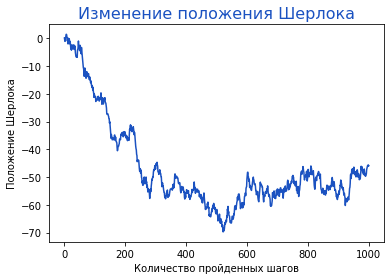

1000


C:\Program Data\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: Degrees of freedom <= 0 for slice
  


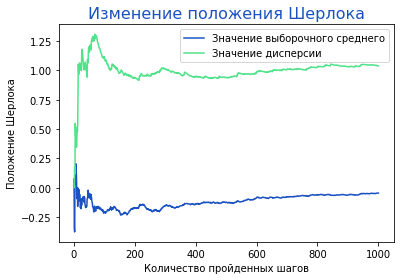

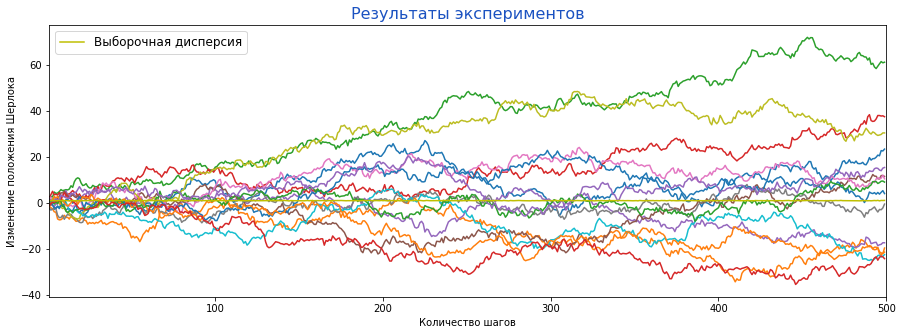

In [5]:
x = np.random.normal(0, 1, size = 1000)
x_cord = x.cumsum()

fig, ax = plt.subplots()
ax.plot(np.arange(1, 1001), x_cord, color = '#1B52C1')
ax.set_xlabel("Количество пройденных шагов")
ax.set_ylabel("Положение Шерлока")
ax.set_title("Изменение положения Шерлока", color = '#1B52C1', fontsize = 16)
plt.show()

x_mean = x_cord / np.arange(1, 1001)
x_var = []
for i in range(1000):
    x_var.append(x[0:i].var())
print(len(x_var))
    
fig, ax = plt.subplots()
ax.plot(np.arange(1, 1001), x_mean, color = '#1B52C1', label = "Значение выборочного среднего")
ax.plot(np.arange(1, 1001), x_var, color = '#51E28B', label = "Значение дисперсии")
ax.set_xlabel("Количество пройденных шагов")
ax.set_ylabel("Положение Шерлока")
ax.set_title("Изменение положения Шерлока", color = '#1B52C1', fontsize = 16)
plt.legend()
plt.show()

def vis(e):
    ax.plot(np.arange(1, 501), e, color = '#CE1E83')
    return e


exp1 = np.random.normal(0, 1, size = 10**3 * 500).reshape(10**3, 500)
exp = np.apply_along_axis(np.cumsum, 1, exp1)
nom = np.random.randint(0, 1000, size = 15)
exp_vis = exp[nom]
exp_tr = np.transpose(exp1)
exp_var = []
for i in range(500):
    exp_var.append(exp_tr[i].var())

plt.figure(figsize = (15, 5))
for i in range(15):
    plt.plot(exp_vis[i])
plt.plot(exp_var, color = 'y', label = "Выборочная дисперсия")   
plt.xlabel("Количество шагов")
plt.ylabel("Изменение положения Шерлока")
plt.title("Результаты экспериментов", color = '#1B52C1', fontsize = 16)
plt.gca().set(xlim = (1, 500))
plt.legend(fontsize = 12)
plt.show()

### Парковки от мэра (40 баллов + 15 бонусных баллов)

Перед выборами в центре города открыли неразмеченную парковку длиной $100$ метров. Каждый приезжающий водитель случайным образом выбирает место длиной $2$ метра, и если место оказалось свободным, встает на парковку до конца дня. Если он не помещается в выбранный отрезок, то водитель в нервном состоянии уезжает с парковки. За один день на парковку пытается встать $1000$ проезжающих мимо водителей. Для выполнения всех пунктов заданий проведите $2000$ симуляций. 

*Hint: Для простоты будем считать, что выбор точки на парковке - это центр машины.*

1. В среднем сколько машин оказываются припаркованы к концу дня? [**20 баллов**]

2. Постройте $95$\%-ый доверительный интервал для ожидаемого количества машин припаркованных к концу дня. [**10 баллов**]

3. Постройте $95$\%-ый доверительный интервал для ожидаемого количества свободного места на парковке к концу дня (в метрах). [**10 баллов**]

4. После возникшего хаоса на парковку добавили регулярную разметку для мест длиной $2$ метра, но водители разделились на два лагеря — тех, кто соблюдает и не соблюдает правила разметки. С вероятностью $p$ приезжает честный водитель и занимает случайное свободное место строго по разметке. Водители второго лагеря паркуются, как раньше. Нарисуйте график, где по оси ординат – процент честных водителей, а по оси абсцисс – процент свободного места на парковке к концу дню для вероятностей $p$ равным от $0$ до $1$ с шагом в $5$\%. Для каждого порога вероятности проведите по $500$ симуляций. [**15 бонусных баллов**]

In [10]:
#ПУНКТ 1
def f(drivers):
    n = 0
    places = np.arange(0, 101)
    for i in range(len(places)):
        for driver in drivers:
            if places[i] == driver:
                places[i - 1] = 0
                places[i + 1] = 0
                places[i] = 0
                n += 1                
    return n
    
    
drivers_mat = np.random.randint(1, 99, size = 1000 * 2000).reshape(2000, 1000)
drivers_n = np.apply_along_axis(f, 1, drivers_mat)
print("Среднее количество припаркованных машин", np.mean(drivers_n))

#ПУНКТ 2
alpha = 0.05
n = 2000
mu = np.mean(drivers_n)
sd = np.sqrt(drivers_n.var()/n)
z_crit = stats.t(n-1).ppf(1 - alpha/2)
print("Доверительный интервал для ожидаемого количества припаркованных машин", mu - z_crit * sd, mu + z_crit * sd)

#ПУНКТ 3
drivers_free = 100 - drivers_n * 2
alpha = 0.05
n = 2000
mu = np.mean(drivers_free)
sd = np.sqrt(drivers_free.var()/n)
z_crit = stats.t(n-1).ppf(1 - alpha/2)
print("Доверительный интервал для ожидаемого количества свободного места (в метрах)", mu - z_crit * sd, mu + z_crit * sd)

Среднее количество припаркованных машин 49.0
Доверительный интервал для ожидаемого количества припаркованных машин 49.0 49.0
Доверительный интервал для ожидаемого количества свободного места (в метрах) 2.0 2.0


### Правдоподобие счастья (25 баллов + 15 бонусных баллов)

Загрузите набор данных по измерению уровня счастья в разных странах мира за 2019 год (**data.csv** в репозитории экзамена). Полное описание датасета доступно по ссылке на Kaggle: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

1. Постройте на графике гистограмму для уровня счастья (переменная Score) и ее функции плотности. Является ли распределение нормальным? [**5 баллов**]

2. Пусть уровень счастья – целевая вещественная переменная $y$, все $y_i$ независимы и нормальны $N(\mu, \sigma^2)$, где $\mu = a + b*x_i$. Выведите функцию правдоподобия и задачу для оптимизации поиска коэффициентов $a$, $b$ и $\sigma^2$. [**15 бонусных баллов**]

3. Оцените параметры с помощью метода максимального правдоподобия, если в роли $x_i$ выступает ВВП на душу населения (GDP per capita). [**10 баллов**]

4. Используя оценённые параметры и медианное значение ВВП на душу населения, оцените вероятность того, что уровень счастья будет больше 5.
[**10 баллов**]

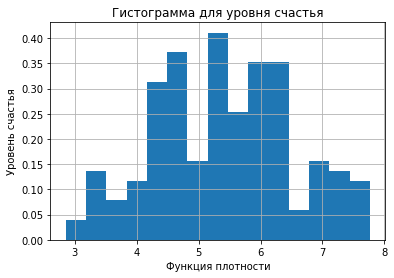

In [19]:
data = pd.read_csv('data.csv')
plt.figure()
data.Score.hist(bins=15, density=True)
plt.title("Гистограмма для уровня счастья")
plt.xlabel("Функция плотности")
plt.ylabel("Уровень счастья")
plt.show()